In [ ]:
%%capture
!pip install cvxopt

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
import cvxopt

---
## 演習問題1 (25点)

以下の一次元の正規分布の最尤推定問題を考える。

$\hat{\mu}, \hat{\sigma}^2 = \arg\max_{\mu, \sigma^2} \log \prod_{n=1}^N \frac{1}{\sqrt{2 \pi \sigma^2}}\exp\left(-\frac{1}{2 \sigma^2}(x^{(n)} - \mu)^2\right)$

このとき、以下を証明せよ。

* $\hat{\mu} = \frac{1}{N} \sum_{n=1}^N x^{(n)}$

* $\hat{\sigma}^2 = \frac{1}{N} \sum_{n=1}^N \left(x^{(n)} - \hat{\mu}\right)^2$


### 【回答】
（原：回答時にはこのコメントを消すこと）

LaTeXを使って数式の記入ができる。

回答をここに記入して、ページをPDF出力しての提出も可。



---
## 演習問題2 [発展] (10点)

指数型分布族に属する分布を一つ選んで、その分布について以下をまとめよ。 
* どのようなデータを生成する分布か？ 
  * 実数、整数、ベクトル、行列など
  * どのような性質のデータを表現するのに使われるか
* 密度関数の式は？
* 最尤推定の式は？
  * 証明も含む

### 【回答】
（原：回答時にはこのコメントを消すこと）

LaTeXを使って数式の記入ができる。

回答をここに記入して、ページをPDF出力しての提出も可。

---
## 演習問題3 （25点）

正規分布に従わないデータでは、Hotteling’s $T^2$で計算される閾値𝛿と実際の誤判定との割合とが一致しないことを実験的に確認せよ。
* 正規分布以外の分布からデータを生成して閾値𝛿と実際の誤判定割合とを比較せよ。
* どのようなデータ・設定で実験をしたかをきちんと記すこと。

### 【回答】
（原：回答時にはこのコメントを消すこと）

講義で用いた下記のコードを適切に書き換える。

回答をここに記入して、ページをPDF出力しての提出も可。

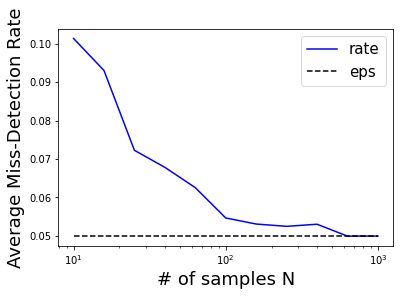

In [ ]:
# 間違え確率と閾値
eps = 0.05
delta = chi2.ppf(1-eps, 1)

# 学習データの個数を変えながら実際に間違えた割合を計算
n_train = np.logspace(1, 3, 11)
c = []
for i, n in enumerate(n_train):
    n = int(n)
    ci = []
    # 100回データを生成して評価
    for seed in range(100):
        # データ生成
        np.random.seed(seed+n)
        x_train = np.random.randn(n)
        x_test = np.random.randn(1000) # テストデータは1000個で固定

        # 平均、標準偏差の推定
        m = np.mean(x_train)
        s = np.std(x_train)

        # 指標の計算
        a = (x_test - m)**2 / s**2

        # 誤りの個数をカウント
        ci.append(np.mean(a >= delta))
    c.append([np.mean(ci), np.std(ci)])
c = np.array(c)

# 結果を描画
plt.figure()
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(n_train, c[:, 0], 'b-')
plt.plot(n_train, [0.05]*n_train.size, 'k--')
plt.xlabel('# of samples N', fontsize=18)
plt.ylabel('Average Miss-Detection Rate', fontsize=18)
plt.legend(['rate', 'eps'], fontsize=15)
plt.show()

---
## 演習問題4 [発展]（10点）

以下の$d$次元の正規分布の最尤推定問題を考える。

$\hat{\mu}, \hat{\Sigma} = \arg\max_{\mu, \Sigma} \log \prod_{n=1}^N \frac{1}{(2 \pi)^{d/2} \sqrt{\det \Sigma}}\exp\left(-\frac{1}{2}(x^{(n)} - \mu)^\top \Sigma^{-1} (x^{(n)} - \mu)\right)$

このとき、以下を証明せよ。

* $\hat{\mu} = \frac{1}{N} \sum_{n=1}^N x^{(n)}$

* $\hat{\Sigma} = \frac{1}{N} \sum_{n=1}^N \left(x^{(n)} - \hat{\mu}\right) \left(x^{(n)} - \hat{\mu}\right)^\top$

### 【回答】
（原：回答時にはこのコメントを消すこと）

LaTeXを使って数式の記入ができる。

回答をここに記入して、ページをPDF出力しての提出も可。

---
## 演習問題5 （20点）

* カーネル密度推定を使って外れ値検知をし、結果をAUROCで評価せよ。
* 混合正規分布を使って外れ値検知をし、結果をAUROCで評価せよ。

### 【回答】
（原：回答時にはこのコメントを消すこと）

以下のコードに追記する。

回答をここに記入して、ページをPDF出力しての提出も可。

In [ ]:
# 乱数シードの固定
np.random.seed(0)

# 分布のパラメータ
m1 = np.zeros(2)                      # 正規分布1の平均
S1 = np.identity(2)                   # 正規分布1の分散共分散行列
m2 = np.array([6, 4])                 # 正規分布2の平均
S2 = np.array([[1, -0.5], [-0.5, 1]]) # 正規分布2の分散共分散行列
ma = np.array([-3, -3])               # 異常データの正規分布の平均
Sa = np.array([[1, 0.5], [0.5, 1]])   # 異常データの正規分布の分散共分散行列

# データ：学習用
x = np.random.multivariate_normal(m1, S1, 120)
x = np.r_[x, np.random.multivariate_normal(m2, S2, 80)]

# データ：テスト用
y = np.random.multivariate_normal(m1, S1, 200)
y = np.r_[y, np.random.multivariate_normal(m2, S2, 80)]
y = np.r_[y, np.random.multivariate_normal(ma, Sa, 20)] # 外れ値20個を追加

# カーネル密度推定
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(x)

# 混合正規分布推定
gmm = GaussianMixture(n_components=2).fit(x)

---
## 演習問題6 （60点）

正規分布、カーネル密度推定、混合正規分布、LOF、SVDD、Isolation Forestを使った外れ値検知それぞれについて結果を比較せよ。それぞれの手法について得意なデータ・不得意なデータの例を述べよ。
* 色々なデータでそれぞれの方法を比較し、どのような場合にどの方法が高い精度で外れ値が検知できるかを検証せよ。
  * 例 正規分布の場合は？ 一様分布の場合は？ 分布の山が複数ある場合は？
  * 次元が1の場合は？ 次元が10の場合は？ 次元が100の場合は？

### 【回答】
（原：回答時にはこのコメントを消すこと）

回答をここに記入して、ページをPDF出力しての提出も可。

以下は正規分布から正常・異常データを生成して、各手法で異常検知、AUROCで評価をする適コードの例。

In [ ]:
# データの生成（例）
def data(dim=2, num_tr=200, num_te=2000, seed=0):
    # 乱数シードの固定
    np.random.seed(seed)

    # 分布のパラメータ
    m1 = np.zeros(dim)                      # 正常データ（正規分布）の平均
    S1 = np.identity(dim)                   # 正常データ（正規分布）の分散共分散行列

    m2 = np.random.rand(dim)                # 異常データ（正規分布）の平均
    L = np.random.rand(dim, dim)
    S2 = L.dot(L.T)
    scale = 1 / np.sqrt(np.diag(S2))
    S2 = S2 / np.outer(scale, scale)        # 異常データ（正規分布）の分散共分散行列

    # データ：学習用
    x = np.random.multivariate_normal(m1, S1, int(1.0*num_tr))
    x = np.r_[x, np.random.multivariate_normal(m2, S2, int(0.0*num_tr))]

    # データ：テスト用
    y = np.random.multivariate_normal(m1, S1, int(0.95*num_te))
    y = np.r_[y, np.random.multivariate_normal(m2, S2, int(0.05*num_te))]
    h = np.r_[np.zeros(int(0.95*num_te)), np.ones(int(0.05*num_te))]

    return x, y, h

In [ ]:
def solveQP(P, q, C):
    m = P.shape[0]
    P = cvxopt.matrix(P)
    q = cvxopt.matrix(q)
    A = cvxopt.matrix(np.ones((1,m)))
    b = cvxopt.matrix(np.array([1.0]))
    G = cvxopt.matrix(np.r_[-np.identity(m), np.identity(m)])
    h = cvxopt.matrix(np.r_[np.zeros(m), C*np.ones(m)])
    cvxopt.solvers.options['show_progress'] = False
    sol = cvxopt.solvers.qp(P,q,A=A,b=b,G=G,h=h)
    ans = np.transpose(np.array(sol['x']))
    return ans[0]

In [ ]:
class Gauss:
    def fit(self, x):
        self.mu = np.mean(x, axis=0)
        self.sigma = np.cov(x.T, bias=True)
        return self

    def anomaly_score(self, x):
        m = x - self.mu[np.newaxis, :]
        p = np.linalg.solve(self.sigma, m.T).T
        return np.sum(p * m, axis=1)

class LOF:
    def fit(self, x):
        self.x = x.copy()
        self.nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(x)
        return self

    def anomaly_score(self, x):
        n = x.shape[0]
        dist, ind = self.nbrs.kneighbors(x)
        a = []
        for i in range(n):
            dist_sub, _ = self.nbrs.kneighbors(self.x[ind[i, 0], :][np.newaxis, :])
            a.append(dist[i, 0] / dist_sub[0, 1])
        return np.array(a)

class SVDD:
    def __init__(self, C=0.1, tol=1e-6):
        self.C = C
        self.tol = tol

    def fit(self, x):

        # 最適化問題を解く
        K = x.dot(x.T)
        P = 2 * K
        q = - np.diag(K)
        self.beta = solveQP(P, q, self.C)

        # 球の中心bと半径Rを求める
        idx_boundary = np.where((self.beta >= self.tol) * (self.beta <= self.C - self.tol))[0]
        self.b = x.T.dot(self.beta)
        self.R = np.linalg.norm(x[idx_boundary, :] - self.b, axis=1).max()
        return self

    def anomaly_score(self, x):
        # 球からの"はみ出し"を計算する
        return np.linalg.norm(x - self.b, axis=1) - self.R

In [ ]:
def evaluate(x, y, h):
    methods = [Gauss(), KernelDensity(kernel='gaussian', bandwidth=0.3), GaussianMixture(n_components=2), LOF(), SVDD(C=0.1), IsolationForest()]
    evals = [lambda v: methods[0].anomaly_score(v),
             lambda v: -methods[1].score_samples(v),
             lambda v: -methods[2].score_samples(v),
             lambda v: methods[3].anomaly_score(v),
             lambda v: methods[4].anomaly_score(v),
             lambda v: -methods[5].decision_function(v)]
    auc = []
    for m, e in zip(methods, evals):
        m = m.fit(x)
        p = e(y)
        auc.append(roc_auc_score(h, p))
    return np.array(auc)

In [ ]:
from tqdm.notebook import tqdm
method_names = ['Gauss', 'KDE', 'GMM', 'LOF', 'SVDD', 'IF']
auc = []
for seed in tqdm(range(10)):
    x, y, h = data(dim=10, num_tr=500, num_te=2000, seed=seed)
    a = evaluate(x, y, h)
    auc.append(a)
auc = np.array(auc)
auc_avg = np.mean(auc, axis=0)
print('Average AUROC')
for n, a in zip(method_names, auc_avg):
    print('%s: %.3f' % (n, a))


Average AUROC
Gauss: 0.970
KDE: 0.957
GMM: 0.970
LOF: 0.924
SVDD: 0.969
IF: 0.965
